In [5]:
import uproot
import awkward as ak
import vector

import matplotlib.pyplot as plt
import numpy as np
plt.style.use("science.mplstyle")


In [6]:
file_sources = ["root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/127C2975-1B1C-A046-AABF-62B77E757A86.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/183BFB78-7B5E-734F-BBF5-174A73020F89.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/1BE226A3-7A8D-1B43-AADC-201B563F3319.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/1DE780E2-BCC2-DC48-815D-9A97B2A4A2CD.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/21DA4CE5-4E50-024F-9CE1-50C77254DD4E.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/2C6A0345-8E2E-9B41-BB51-DB56DFDFB89A.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/3676E287-A650-8F44-BBCB-3B8556966406.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/411A019C-7058-FD42-AD50-DE74433E6859.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/46A8960A-E58F-4648-9C12-2708FE7C12FB.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/4F0B53A7-6440-924B-AF48-B5B61D3CE23F.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/790F8A75-8256-3B46-8209-850DE0BE3C77.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/7F53D1DE-439E-AD48-871E-D3458DABA798.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/8A696857-C147-B04A-905A-F85FB76EDA23.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/8B253755-51F2-CB49-A4B6-C79637CAE23F.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/9528EA75-1C0B-9047-A9A3-6A47564F7A98.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/A6605227-0B58-864E-8422-B8990D18F622.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/B2DC29E0-8679-1D4F-A5AE-E7D0284A20D4.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/B450B2B3-BEF8-8C43-82BF-7AD0EF2EA7EA.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/B7AA7F04-5D5F-514A-83A6-9A275198852C.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/B93B57BF-4239-A049-9531-4C542C370185.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/C4558F81-9F2C-1349-B528-6B9DD6838D6D.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/C8CFC890-D4B8-8A4F-8699-C6ACCDF1620A.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/CAA285FF-7A12-F945-9183-DC7042178535.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/CD267D88-E57D-3B44-AC45-0712E2E12B87.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/E7C51551-7A75-5C41-B468-46FB922F36A9.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/EBC200F4-C06F-CE45-BAAA-7CAECDD3076F.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/EEB2FE3F-7CF3-BF4A-9F70-3F89FACE698E.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/F5E234F9-1E9C-0042-B395-AB6407E4A336.root"]




In [20]:
# compile the data
keys = ["pt", "eta", "phi"]
filtered_muons = {
                 "pt":np.empty((1,)),
                 "eta":np.empty((1,)),
                 "phi":np.empty((1,))
                }

filtered_amuons = {
                 "pt":np.empty((1,)),
                 "eta":np.empty((1,)),
                 "phi":np.empty((1,))
                }

for i in range(28):
    
    for key in keys:
        loc_mu_feature = np.load(f"nano_test/filtered_mu_{key}_{i}.npy")
        filtered_muons[key] = np.hstack((filtered_muons[key], loc_mu_feature))
        
        loc_amu_feature = np.load(f"nano_test/filtered_amu_{key}_{i}.npy")
        filtered_amuons[key] = np.hstack((filtered_amuons[key], loc_amu_feature))
        
   
for key in keys:
    
    filtered_muons[key] = filtered_muons[key][1:]
    filtered_amuons[key] = filtered_amuons[key][1:]
    
    print(key, filtered_muons[key].shape)

    


pt (31286759,)
eta (31286759,)
phi (31286759,)


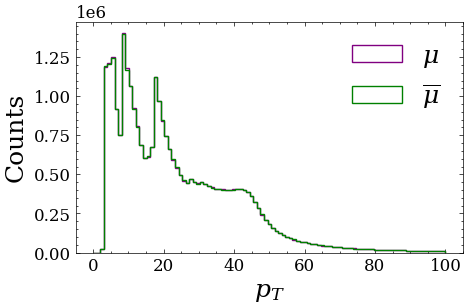

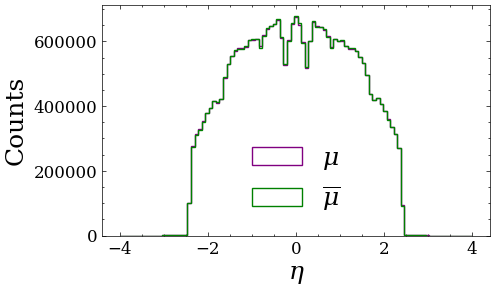

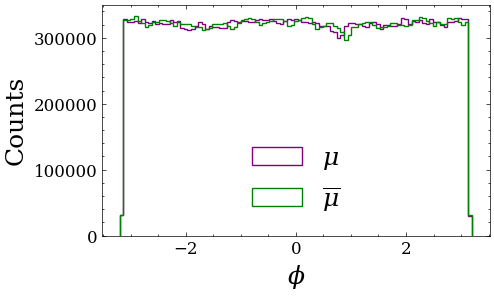

In [22]:
bins = {"pt":np.linspace(0, 100, 100), 
       "eta":np.linspace(-4, 4, 100),
       "phi":np.linspace(-3.2, 3.2, 100)
       }

nice_labels = {"pt":"$p_T$", 
       "eta":"$\eta$", 
       "phi":"$\phi$", 
       }


for key in keys:

    plt.figure()
    plt.hist(filtered_muons[key], bins = bins[key], histtype = "step", label = "$\mu$", color = "purple")
    plt.hist(filtered_amuons[key], bins = bins[key], histtype = "step", label = "$\overline{\mu}$", color = "green")
    plt.xlabel(nice_labels[key])
    plt.ylabel("Counts")
    plt.legend()
    plt.show()



In [28]:

import vector

muon_mass = 0.1056583755 # GeV





mu_E = np.sqrt(muon_mass**2 + (filtered_muons["pt"]*np.cosh(filtered_muons["eta"]))**2)
amu_E = np.sqrt(muon_mass**2 + (filtered_amuons["pt"]*np.cosh(filtered_amuons["eta"]))**2)

mu_px = filtered_muons["pt"]*np.cos(filtered_muons["phi"])
amu_px = filtered_amuons["pt"]*np.cos(filtered_amuons["phi"])

mu_py = filtered_muons["pt"]*np.sin(filtered_muons["phi"])
amu_py = filtered_amuons["pt"]*np.sin(filtered_amuons["phi"])

mu_pz = filtered_muons["pt"]*np.sinh(filtered_muons["eta"])
amu_pz = filtered_amuons["pt"]*np.sinh(filtered_amuons["eta"])

dimu_E = mu_E + amu_E
dimu_px = mu_px + amu_px
dimu_py = mu_py + amu_py
dimu_pz = mu_pz + amu_pz

dimu_M = np.sqrt(dimu_E**2 - dimu_px**2 - dimu_py**2 - dimu_pz**2)

    


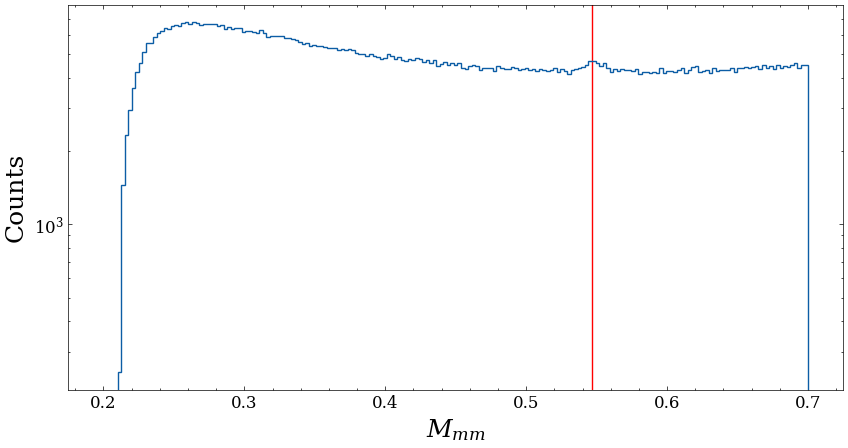

In [66]:
bins = np.linspace(0.2, 0.7, 200)
#bins = np.logspace(-0.5, 2.5, 200)
loc_filter = (filtered_muons["pt"] > 0) & (filtered_amuons["pt"] > 0)


plt.figure(figsize = (10, 5))
plt.axvline(0.547, color = "red")
plt.hist(dimu_M[loc_filter], bins = bins, histtype = "step", label = "mu")
#plt.axvline(91)

plt.xlabel("$M_{mm}$")
plt.ylabel("Counts")
plt.yscale("log")
#plt.xscale("log")
plt.show()
    

In [44]:
file_sources = ["root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/127C2975-1B1C-A046-AABF-62B77E757A86.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/183BFB78-7B5E-734F-BBF5-174A73020F89.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/1BE226A3-7A8D-1B43-AADC-201B563F3319.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/1DE780E2-BCC2-DC48-815D-9A97B2A4A2CD.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/21DA4CE5-4E50-024F-9CE1-50C77254DD4E.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/2C6A0345-8E2E-9B41-BB51-DB56DFDFB89A.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/3676E287-A650-8F44-BBCB-3B8556966406.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/411A019C-7058-FD42-AD50-DE74433E6859.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/46A8960A-E58F-4648-9C12-2708FE7C12FB.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/4F0B53A7-6440-924B-AF48-B5B61D3CE23F.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/790F8A75-8256-3B46-8209-850DE0BE3C77.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/7F53D1DE-439E-AD48-871E-D3458DABA798.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/8A696857-C147-B04A-905A-F85FB76EDA23.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/8B253755-51F2-CB49-A4B6-C79637CAE23F.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/9528EA75-1C0B-9047-A9A3-6A47564F7A98.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/A6605227-0B58-864E-8422-B8990D18F622.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/B2DC29E0-8679-1D4F-A5AE-E7D0284A20D4.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/B450B2B3-BEF8-8C43-82BF-7AD0EF2EA7EA.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/B7AA7F04-5D5F-514A-83A6-9A275198852C.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/B93B57BF-4239-A049-9531-4C542C370185.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/C4558F81-9F2C-1349-B528-6B9DD6838D6D.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/C8CFC890-D4B8-8A4F-8699-C6ACCDF1620A.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/CAA285FF-7A12-F945-9183-DC7042178535.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/CD267D88-E57D-3B44-AC45-0712E2E12B87.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/E7C51551-7A75-5C41-B468-46FB922F36A9.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/EBC200F4-C06F-CE45-BAAA-7CAECDD3076F.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/EEB2FE3F-7CF3-BF4A-9F70-3F89FACE698E.root","root://eospublic.cern.ch//eos/opendata/cms/Run2016H/DoubleMuon/NANOAOD/UL2016_MiniAODv2_NanoAODv9-v1/2510000/F5E234F9-1E9C-0042-B395-AB6407E4A336.root"]


root_file = file_sources[0]




events = uproot.open(root_file)

In [46]:
print(events.keys())



['tag;1', 'Events;1', 'LuminosityBlocks;1', 'Runs;1', 'MetaData;1', 'ParameterSets;1']


In [56]:
print(events['Events;1'].keys())

['run', 'luminosityBlock', 'event', 'nboostedTau', 'boostedTau_chargedIso', 'boostedTau_eta', 'boostedTau_leadTkDeltaEta', 'boostedTau_leadTkDeltaPhi', 'boostedTau_leadTkPtOverTauPt', 'boostedTau_mass', 'boostedTau_neutralIso', 'boostedTau_phi', 'boostedTau_photonsOutsideSignalCone', 'boostedTau_pt', 'boostedTau_puCorr', 'boostedTau_rawAntiEle2018', 'boostedTau_rawIso', 'boostedTau_rawIsodR03', 'boostedTau_rawMVAnewDM2017v2', 'boostedTau_rawMVAoldDM2017v2', 'boostedTau_rawMVAoldDMdR032017v2', 'boostedTau_charge', 'boostedTau_decayMode', 'boostedTau_jetIdx', 'boostedTau_rawAntiEleCat2018', 'boostedTau_idAntiEle2018', 'boostedTau_idAntiMu', 'boostedTau_idMVAnewDM2017v2', 'boostedTau_idMVAoldDM2017v2', 'boostedTau_idMVAoldDMdR032017v2', 'CaloMET_phi', 'CaloMET_pt', 'CaloMET_sumEt', 'ChsMET_phi', 'ChsMET_pt', 'ChsMET_sumEt', 'nCorrT1METJet', 'CorrT1METJet_area', 'CorrT1METJet_eta', 'CorrT1METJet_muonSubtrFactor', 'CorrT1METJet_phi', 'CorrT1METJet_rawPt', 'DeepMETResolutionTune_phi', 'DeepM